In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [43]:
df = pd.read_csv('Rentabilidad de estrategias base 100.csv')

In [44]:
df['year'] = df['Date'].apply(lambda x: x.split('-')[0])

In [45]:
años = ['2010','2011','2012','2013','2014','2015',
        '2016','2017','2018','2019']

In [175]:
df2 = df[df['year'].isin(años)]
df2 = df2.drop('year',axis=1)
df2=df2.set_index('Date').tail(365)

In [176]:
df2.head()

,LA1,SA1,LSA1,LA101,SA101,LSA101,LA2,SA2,LSA2,LA3,...,LSA53,LA54,SA54,LSA54,LA6,SA6,LSA6,LAMAR,SAMAR,LSAMAR
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-18,1737.367401,0.113627,139.034489,1291.966451,0.166123,164.707494,553.739362,0.031974,14.510287,763.821079,...,13.854708,898.782734,0.047452,32.007002,495.522359,0.044421,17.635502,1904.002905,0.046013,58.155216
2018-06-19,1750.814106,0.116159,143.209326,1293.495752,0.168736,167.493579,545.411240,0.031958,14.284919,758.196310,...,13.656368,884.897775,0.047410,31.483710,483.974481,0.044032,17.070091,1882.663345,0.046167,57.697679
2018-06-20,1765.306844,0.115581,143.681921,1309.061274,0.168530,169.304515,547.405108,0.031651,14.200010,762.796214,...,13.707792,892.140540,0.047169,31.581760,486.225968,0.043654,17.002643,1899.010267,0.045955,57.934836
2018-06-21,1728.545837,0.118855,144.759684,1269.935028,0.171776,167.505106,536.898249,0.032599,14.352823,736.223146,...,13.738785,861.077829,0.047845,30.934743,466.923195,0.044066,16.488329,1830.275060,0.046551,56.588359
2018-06-22,1783.524244,0.118681,149.152063,1297.768442,0.169826,169.274735,538.997305,0.031642,13.987535,748.297776,...,13.678007,892.112858,0.047978,32.135456,477.701035,0.043617,16.700956,1848.967289,0.045477,55.861529


In [174]:
df3 = df2.tail(365).transpose()
df3.head()

Date,2018-06-18,2018-06-19,2018-06-20,2018-06-21,2018-06-22,2018-06-25,2018-06-26,2018-06-27,2018-06-28,2018-06-29,...,2019-10-28,2019-10-29,2019-10-30,2019-10-31,2019-11-01,2019-11-04,2019-11-05,2019-11-06,2019-11-07,2019-11-08
LA1,1737.367401,1750.814106,1765.306844,1728.545837,1783.524244,1749.215797,1772.949826,1777.329054,1796.005396,1813.596260,...,3314.371297,3353.445280,3420.278641,3393.431783,3462.520458,3414.448461,3373.679486,3413.993932,3375.498542,3388.313155
SA1,0.113627,0.116159,0.115581,0.118855,0.118681,0.125115,0.124556,0.129758,0.127258,0.126899,...,0.089416,0.089560,0.090104,0.091462,0.086351,0.082313,0.081873,0.083076,0.081059,0.080931
LSA1,139.034489,143.209326,143.681921,144.759684,149.152063,154.369418,155.773794,162.664451,161.239500,162.363787,...,299.144587,303.153854,311.037651,313.283906,302.153706,283.831655,278.924911,286.354334,276.173628,276.786539
LA101,1291.966451,1293.495752,1309.061274,1269.935028,1297.768442,1238.114122,1269.007210,1258.436532,1281.524478,1293.331877,...,2450.563908,2449.241216,2504.382984,2492.303244,2582.336786,2647.538776,2615.014653,2593.955675,2622.756189,2619.289292
SA101,0.166123,0.168736,0.168530,0.171776,0.169826,0.174493,0.175700,0.181140,0.179070,0.178460,...,0.138392,0.136909,0.138095,0.140594,0.134953,0.133924,0.133162,0.132454,0.132202,0.131317


In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [51]:
z = linkage(df3,method='ward')# method= single, complete, average

In [23]:
import matplotlib.pyplot as plt

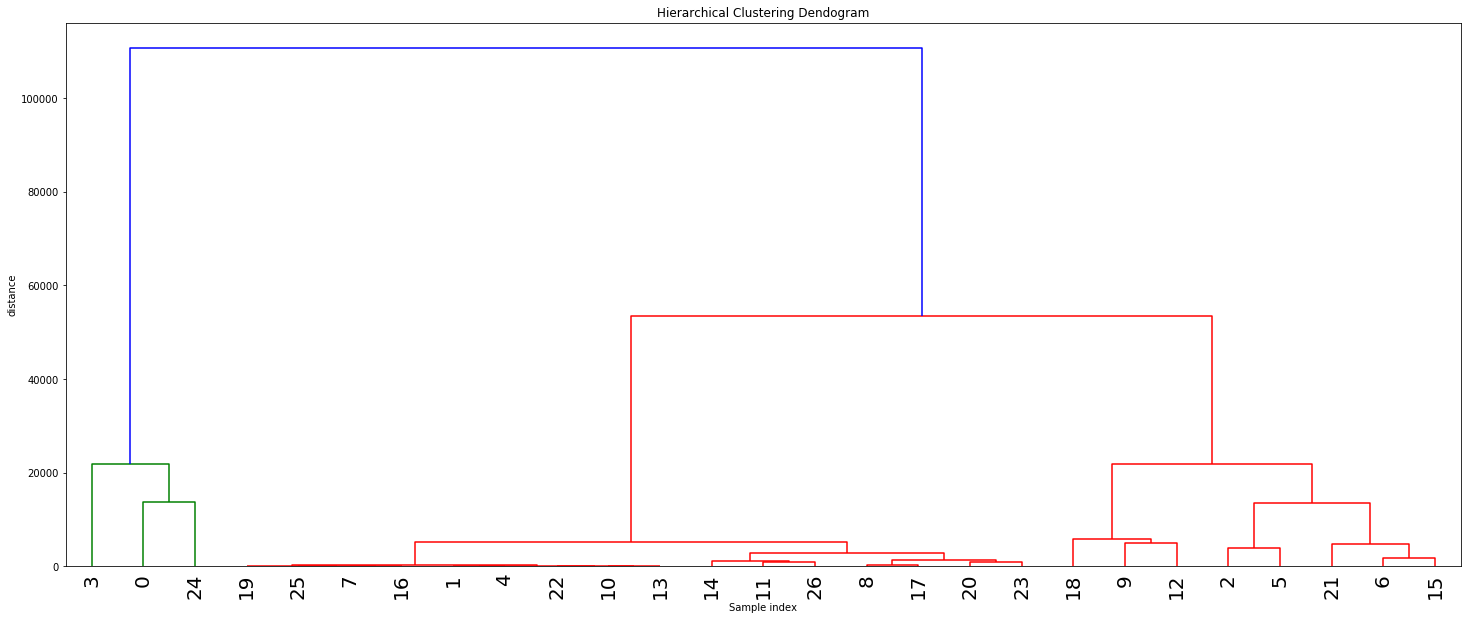

In [52]:
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Sample index')
plt.ylabel('distance')
dendrogram(z,
          leaf_rotation=90.,#Rotate the x axis labels
          leaf_font_size=20.,#Font size for the x axis labels
)
plt.show()

In [199]:
z[0]

array([ 7.        , 16.        , 12.94332757,  2.        ])

In [200]:
z

array([[7.00000000e+00, 1.60000000e+01, 1.29433276e+01, 2.00000000e+00],
       [2.50000000e+01, 2.70000000e+01, 1.70546095e+01, 3.00000000e+00],
       [1.00000000e+00, 4.00000000e+00, 2.21354555e+01, 2.00000000e+00],
       [1.00000000e+01, 1.30000000e+01, 2.62366899e+01, 2.00000000e+00],
       [1.90000000e+01, 2.80000000e+01, 3.95462649e+01, 4.00000000e+00],
       [2.20000000e+01, 3.00000000e+01, 5.16977939e+01, 3.00000000e+00],
       [2.90000000e+01, 3.20000000e+01, 1.43880385e+02, 5.00000000e+00],
       [8.00000000e+00, 1.70000000e+01, 2.56321813e+02, 2.00000000e+00],
       [3.10000000e+01, 3.30000000e+01, 2.98583613e+02, 9.00000000e+00],
       [2.00000000e+01, 2.30000000e+01, 7.95568114e+02, 2.00000000e+00],
       [1.10000000e+01, 2.60000000e+01, 8.60808491e+02, 2.00000000e+00],
       [1.40000000e+01, 3.70000000e+01, 1.20763118e+03, 3.00000000e+00],
       [3.40000000e+01, 3.60000000e+01, 1.27474544e+03, 4.00000000e+00],
       [6.00000000e+00, 1.50000000e+01, 1.79881246e

# Clarans (Clustering Large Applications based on RANdomized Search)

- 1: Decide on values for v, h and k.
- 2: for i = 1 : h do
- 3: Randomly select a node as the current node C in the graph.
- 4: Calculate the total sum of distances for current node C.
- 5: Set counter j to 1.
- 6: while j ≤ v do
- 7: Randomly select a neighbour W of C.
- 8: Calculate the total sum of distances for neighbour W.
- 9: if total sum of distances for W is lower than for C then
- 10: Assign W as the current node C.
- 11: Reset j to 1.
- 12: else
- 13: j = j + 1.
- 14: end if
- 15: end while
- 16: if total sum of distances for C is lowest cost found so far then
- 17: Update the best solution found so far.
- 18: end if
- 19: end for
- 20: return the best solution that is found.

In [55]:
#!pip install pyclustering

In [56]:
from pyclustering.cluster.clarans import clarans;
from pyclustering.utils import timedcall;
from sklearn import datasets

In [178]:
#iris =  datasets.load_iris();
data = np.array(df3)
#data.head()

In [179]:

#data = data.tolist()

#get a glimpse of dataset
#print("A peek into the dataset : ",data[:4])


"""!
@brief Constructor of clustering algorithm CLARANS.
@details The higher the value of maxneighbor, the closer is CLARANS to K-Medoids, and the longer is each search of a local minima.
@param[in] data: Input data that is presented as list of points (objects), each point should be represented by list or tuple.
@param[in] number_clusters: amount of clusters that should be allocated.
@param[in] numlocal: the number of local minima obtained (amount of iterations for solving the problem).
@param[in] maxneighbor: the maximum number of neighbors examined.        
"""
clarans_instance = clarans(data, 3, 6, 4);

#calls the clarans method 'process' to implement the algortihm
(ticks, result) = timedcall(clarans_instance.process);
print("Execution time : ", ticks, "\n");

#returns the clusters 
clusters = clarans_instance.get_clusters();

#returns the mediods 
medoids = clarans_instance.get_medoids();

Execution time :  16.477685999999267 



In [180]:
print("Index of the points that are in a cluster : ",clusters,'\n')
#print("The target class of each datapoint : ",iris.target,'\n')
#print("The index of medoids that algorithm found to be best : ",medoids)

Index of the points that are in a cluster :  [[0, 3, 24], [6, 9, 12, 15, 18, 21], [1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26]] 



In [181]:
#strategies = []
#clus = []
dic = {}
for var in range(len(clusters)):
    for var2 in clusters[var]:
        dic[var2] = var
        #strategies.append(df3.index[var2])
        #clus.append(var)


In [182]:
import operator

In [183]:
resultado = sorted(dic.items(), key=operator.itemgetter(0))

In [184]:
dic = {}
for var in resultado:
    dic[df3.index[var[0]]] = var[1]

In [185]:
dic

{'LA1': 0,
 'SA1': 2,
 'LSA1': 2,
 'LA101': 0,
 'SA101': 2,
 'LSA101': 2,
 'LA2': 1,
 'SA2': 2,
 'LSA2': 2,
 'LA3': 1,
 'SA3': 2,
 'LSA3': 2,
 'LA44': 1,
 'SA44': 2,
 'LSA44': 2,
 'LA53': 1,
 'SA53': 2,
 'LSA53': 2,
 'LA54': 1,
 'SA54': 2,
 'LSA54': 2,
 'LA6': 1,
 'SA6': 2,
 'LSA6': 2,
 'LAMAR': 0,
 'SAMAR': 2,
 'LSAMAR': 2}

In [186]:
clf = pd.DataFrame.from_dict(dic,orient='index')#,columns=['strategies','cluster'])

In [187]:
clf = clf.reset_index()

In [188]:
results = clf.rename(columns={'index':'strategies',0:'clusters'})

In [189]:
results

,strategies,clusters
0,LA1,0
1,SA1,2
2,LSA1,2
3,LA101,0
4,SA101,2
5,LSA101,2
6,LA2,1
7,SA2,2
8,LSA2,2
9,LA3,1


In [190]:
sharpeclusters =[] 
Features = df2
for i in range(results['clusters'].nunique()):
    
    l = results.loc[results['clusters'] == i].index.values.astype(int).tolist()
    dfexp=Features.pct_change().iloc[: , l].sum(axis = 1, skipna = True)
    r = dfexp.mean()
    s = dfexp.std()
    
    sharpeclusters.append(r/s)
sharpeclusters = np.asanyarray(sharpeclusters)

In [191]:
sharpeclusters

array([ 0.06206268,  0.02784358, -0.02979296])

In [192]:
selection = sharpeclusters.argmax()
cond = results['clusters'] == selection

results['selection'] = np.where(cond, 1, 0)

In [193]:
results['selection']

0     1
1     0
2     0
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    1
25    0
26    0
Name: selection, dtype: int64

In [91]:
len(clusters)

3

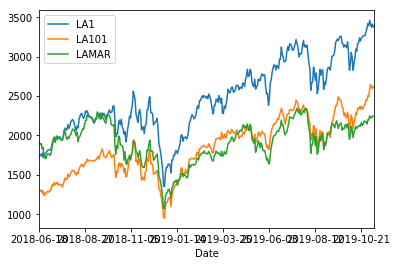

In [201]:
df3.transpose().iloc[:,[0,3,24]].plot()